### Label creation for Sentiment Analysis of Amazon Customer Reviews using Unsupervised Learning

Label identification using **K-Means Clustering** without **headline_polarity**

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

In [53]:
# Load data
data = pd.read_csv('amazon_customer_reviews.csv', delimiter=',', index_col=None, error_bad_lines=False)

data.columns

Index(['star_rating', 'review_headline', 'review_body', 'headline_polarity',
       'body_polarity'],
      dtype='object')

In [54]:
X = pd.DataFrame(data, columns = ['star_rating','body_polarity'])
np.where(pd.isnull(X))

(array([], dtype=int64), array([], dtype=int64))

In [55]:
X = X.dropna(how='all')
X.shape

(1000000, 2)

In [56]:
# for k = 2 (positive/negative)
kmeans = KMeans(n_clusters=2, random_state=8).fit(X)

print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[4.80326444 0.36763101]
 [1.95699066 0.06696759]]
[0 0 0 ... 0 0 0]


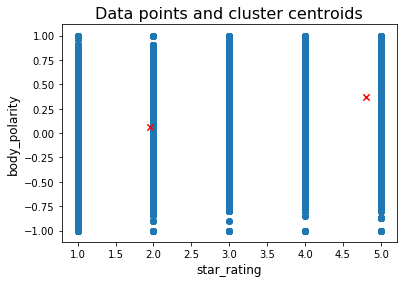

In [57]:
# Plotting the cluster centers and the data points
plt.scatter(X['star_rating'], X['body_polarity'])  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=40, marker='x')
plt.xlabel('star_rating', fontsize=12)
plt.ylabel('body_polarity', fontsize=12)
plt.title('Data points and cluster centroids', fontsize=16)
plt.show()

In [58]:
X_k2 = X
X_k2['label'] = kmeans.labels_

In [59]:
X_k2['label'].value_counts() 

0    787209
1    212791
Name: label, dtype: int64

In [60]:
# for k = 3 (positive/negative/neutral)
kmeans = KMeans(n_clusters=3, random_state=8).fit(X)

print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[5.00000000e+00 3.90572623e-01 1.22915567e-12]
 [1.36106455e+00 1.54108430e-02 1.00000000e+00]
 [3.66685038e+00 2.35063558e-01 3.33149619e-01]]
[0 0 0 ... 2 0 0]


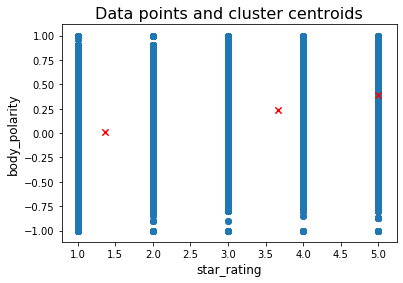

In [61]:
# Plotting the cluster centers and the data points
plt.scatter(X['star_rating'], X['body_polarity'])  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=40,
            c='red', marker='x')
plt.xlabel('star_rating', fontsize=12)
plt.ylabel('body_polarity', fontsize=12)
plt.title('Data points and cluster centroids', fontsize=16)
plt.show()

In [62]:
X_k3 = X
X_k3['label'] = kmeans.labels_

In [63]:
X_k3['label'].value_counts() 

0    632337
2    232244
1    135419
Name: label, dtype: int64

In [66]:
data['label'] = kmeans.labels_

In [73]:
data.loc[(data['label'] == 0)]

,star_rating,review_headline,review_body,headline_polarity,body_polarity,label
0,5,five stars,happy purchase,0.000000,0.800000,0
1,5,perfect fit perfect feeling made usa,cardigan perfect lightweight fits true size po...,0.800000,0.825000,0
2,5,fantastic successor baking flavor,wow gorgeous baking cookbook layout recipes co...,0.400000,0.337083,0
4,5,five stars,improved vision,0.000000,0.000000,0
5,5,keep buying,fourth fifth pair wear time dont fall apart ot...,0.000000,0.500000,0
...,...,...,...,...,...,...
999992,5,nice,little concerned fit hat fit perfectly bandana...,0.600000,0.403125,0
999994,5,pleased,years years ago original links links 2003 play...,0.500000,0.437500,0
999996,5,five stars,good,0.000000,0.700000,0
999998,5,surpising new voice romance genre,read book based glowing recommends friends cou...,0.136364,0.247734,0


### Evaluating Clusters

In [ ]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))